In [ ]:
!pip install dotmap

In [3]:
import os
import pickle
from pathlib import Path
import pandas as pd

# Define paths
PPMI_CLINICAL_GEN_DATA_DIR_INSIDE = Path('/content/drive/MyDrive/Ruhan')
dataset_name = '01_22_2024'
PPMI_CLINICAL_GEN_DATA_DIR_INSIDE = PPMI_CLINICAL_GEN_DATA_DIR_INSIDE / 'dadu_etal_generated_data/clinical/ppmi'

# Load preprocessed data
preprocessed_data = pd.read_pickle(os.path.join(PPMI_CLINICAL_GEN_DATA_DIR_INSIDE, 'preprocessed', f"{dataset_name}.pkl"))

# Load representation learning data
representation_learning_data = pd.read_pickle(os.path.join(PPMI_CLINICAL_GEN_DATA_DIR_INSIDE, 'representation_learning', f"{dataset_name}.pkl"))

# Load clustering data
clustering_data = pd.read_pickle(os.path.join(PPMI_CLINICAL_GEN_DATA_DIR_INSIDE, 'clustering', f"{dataset_name}.pkl"))

# Combine data
input_data = {**preprocessed_data, **representation_learning_data, **clustering_data}
datasets = input_data['data_names']
dset_name = 'paper_experiment_flip_outlier'
input_data['M_chosen'][dset_name]


FileNotFoundError: [Errno 2] No such file or directory: '\\content\\drive\\MyDrive\\Ruhan\\dadu_etal_generated_data\\clinical\\ppmi\\preprocessed\\01_22_2024.pkl'

In [ ]:
dataframe = pd.DataFrame(input_data['M_chosen'][dset_name])


In [ ]:
bl_columns = [col for col in dataframe.columns if 'BL' in col]
v04_columns = [col for col in dataframe.columns if 'V04' in col]
v06_columns = [col for col in dataframe.columns if 'V06' in col]
v08_columns = [col for col in dataframe.columns if 'V08' in col]
v10_columns = [col for col in dataframe.columns if 'V10' in col]
v12_columns = [col for col in dataframe.columns if 'V12' in col]

bl_dataframe = dataframe[bl_columns]
v04_dataframe = dataframe[v04_columns]
v06_dataframe = dataframe[v06_columns]
v08_dataframe = dataframe[v08_columns]
v10_dataframe = dataframe[v10_columns]
v12_dataframe = dataframe[v12_columns]

In [ ]:
# file_name = "v12_dataset.xlsx"
# v12_dataframe.to_excel(file_name)

In [2]:
bl_v04_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col]
bl_v04_v06_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col or 'V06' in col]
bl_v04_v06_v08_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col or 'V06' in col or 'V08' in col]
bl_v04_v06_v08_v10_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col or 'V06' in col or 'V08' in col  or 'V10' in col]
bl_v04_v06_v08_v10_v12_columns = [col for col in dataframe.columns if 'BL' in col or 'V04' in col or 'V06' in col or 'V08' in col  or 'V10' in col or 'V12' in col]

bl_v04_dataframe = dataframe[bl_v04_columns]
bl_v04_v06_dataframe = dataframe[bl_v04_v06_columns]
bl_v04_v06_v08_dataframe = dataframe[bl_v04_v06_v08_columns]
bl_v04_v06_v08_v10_dataframe = dataframe[bl_v04_v06_v08_v10_columns]
bl_v04_v06_v08_v10_v12_dataframe = dataframe[bl_v04_v06_v08_v10_v12_columns]


NameError: name 'dataframe' is not defined

In [1]:
bl_v04_dataframe

NameError: name 'bl_v04_dataframe' is not defined

In [ ]:
import numpy as np
from sklearn.decomposition import NMF, PCA, FastICA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import os

# Create a folder to save cluster plots if it doesn't exist
output_folder = '/content/cluster_plot'
os.makedirs(output_folder, exist_ok=True)

# Function to plot clusters
def plot_clusters(ax, X, labels, model_name):
    unique_labels = set(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    for i, (label, color) in enumerate(zip(unique_labels, colors)):
        ax.scatter(X[labels == label, 0], X[labels == label, 1], c=[color], label=f'Cluster {label}')
    ax.set_title(f'{model_name} clustering')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

# Define list of dataframes
all_dataframes = [bl_dataframe, bl_v04_v06_dataframe, v06_dataframe, v08_dataframe, v10_dataframe, v12_dataframe]
all_dataframes_name = ['bl_dataframe', 'v04_dataframe', 'v06_dataframe', 'v08_dataframe', 'v10_dataframe', 'v12_dataframe']

# Assign names to the dataframes
for i, dataframe in enumerate(all_dataframes):
    dataframe.name = f'Dataset_{all_dataframes_name[i]}'

# Define models
models = [
    ("NMF", NMF(n_components=3, init='random', random_state=0)),
    ("PCA", PCA(n_components=3)),
    ("ICA", FastICA(n_components=3, random_state=0))
]

# Iterate over each dataframe
for dataframe in all_dataframes:
    # Preprocess dataframe
    X = dataframe

    # Train and save cluster plots for each model
    for model_name, model in models:
        # Fit the model
        X_transformed = model.fit_transform(X)

        # K-means clustering
        kmeans = KMeans(n_clusters=3, random_state=0).fit(X_transformed)
        fig, ax = plt.subplots()
        plot_clusters(ax, X_transformed, kmeans.labels_, f'K-means on {model_name}')
        plt.savefig(os.path.join(output_folder, f'{model_name}_KMeans_{dataframe.name}.png'))
        plt.close()

        # GMM clustering
        gmm = GaussianMixture(n_components=3, random_state=0).fit(X_transformed)
        fig, ax = plt.subplots()
        plot_clusters(ax, X_transformed, gmm.predict(X_transformed), f'GMM on {model_name}')
        plt.savefig(os.path.join(output_folder, f'{model_name}_GMM_{dataframe.name}.png'))
        plt.close()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations

In [ ]:
!zip -r cluster.zip /content/cluster_plot

  adding: content/cluster_plot/ (stored 0%)
  adding: content/cluster_plot/PCA_GMM_Dataset_v10_dataframe.png (deflated 5%)
  adding: content/cluster_plot/NMF_GMM_Dataset_bl_dataframe.png (deflated 6%)
  adding: content/cluster_plot/ICA_KMeans_Dataset_v08_dataframe.png (deflated 4%)
  adding: content/cluster_plot/NMF_GMM_Dataset_v06_dataframe.png (deflated 5%)
  adding: content/cluster_plot/ICA_KMeans_Dataset_v04_dataframe.png (deflated 4%)
  adding: content/cluster_plot/PCA_GMM_Dataset_v04_dataframe.png (deflated 4%)
  adding: content/cluster_plot/NMF_GMM_Dataset_v10_dataframe.png (deflated 5%)
  adding: content/cluster_plot/ICA_GMM_Dataset_v06_dataframe.png (deflated 4%)
  adding: content/cluster_plot/ICA_KMeans_Dataset_bl_dataframe.png (deflated 4%)
  adding: content/cluster_plot/NMF_KMeans_Dataset_v08_dataframe.png (deflated 5%)
  adding: content/cluster_plot/PCA_GMM_Dataset_v12_dataframe.png (deflated 5%)
  adding: content/cluster_plot/ICA_GMM_Dataset_v10_dataframe.png (deflated 5%

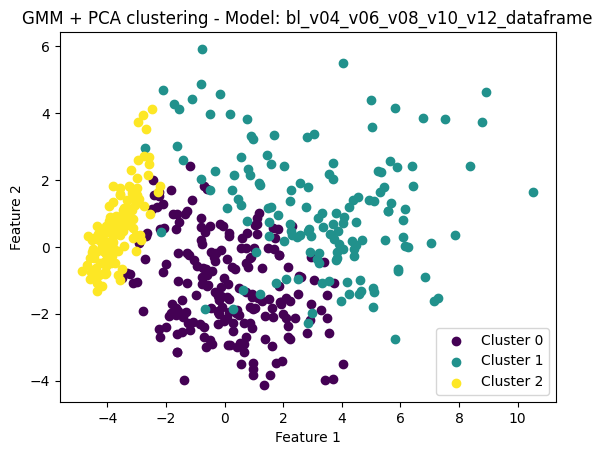

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# Define a function to plot clusters
def plot_clusters(ax, X, labels, dataset_name, model_name):
    unique_labels = set(labels)
    colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))
    for i, (label, color) in enumerate(zip(unique_labels, colors)):
        ax.scatter(X[labels == label, 0], X[labels == label, 1], c=[color], label=f'Cluster {label}')
    ax.set_title(f'{model_name} clustering - Model: {dataset_name}')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()

# Define your list of dataframes
# Define your list of dataframes
all_dataframes = [
                # bl_dataframe, v04_dataframe, v06_dataframe, v08_dataframe, v10_dataframe, v12_dataframe,
                #   bl_v04_dataframe,
                #   bl_v04_v06_dataframe,
                #   bl_v04_v06_v08_dataframe,
                #   bl_v04_v06_v08_v10_dataframe,
                  bl_v04_v06_v08_v10_v12_dataframe
                  ]

dataset_names = [
                # 'bl_dataframe', 'v04_dataframe', 'v06_dataframe', 'v08_dataframe', 'v10_dataframe', 'v12_dataframe',
                #  'bl_v04_dataframe',
                #  'bl_v04_v06_dataframe',
                #  'bl_v04_v06_v08_dataframe',
                #  'bl_v04_v06_v08_v10_dataframe',
                 'bl_v04_v06_v08_v10_v12_dataframe'
                 ]

# Define your PCA model
pca = PCA(n_components=3)

# Train Gaussian Mixture Model (GMM) on PCA-transformed data
X = all_dataframes[0]

dataset_name = 'bl_v04_v06_v08_v10_v12_dataframe'

X_pca = pca.fit_transform(X)
gmm_pca = GaussianMixture(n_components=3, random_state=0).fit(X_pca)

# Transform each dataframe using PCA and apply the trained GMM model
fig, ax = plt.subplots()


# for X, dataset_name, ax in zip(all_dataframes, dataset_names):
X_pca = pca.transform(X)
labels = gmm_pca.predict(X_pca)

    # Plot clusters
plot_clusters(ax, X_pca, labels, dataset_name, "GMM + PCA")

# Save plot
# plt.savefig(f"/content/combination_cluster_plot/{model_name}_{dataset_name}.png")

# Show the plot
# plt.tight_layout()
# plt.show()



In [ ]:
!zip -r cluster.zip /content/combination_cluster_plot

  adding: content/combination_cluster_plot/ (stored 0%)
  adding: content/combination_cluster_plot/GMM_PCA_v08_dataframe.png (deflated 97%)
  adding: content/combination_cluster_plot/.ipynb_checkpoints/ (stored 0%)
  adding: content/combination_cluster_plot/GMM_PCA_bl_v04_v06_v08_v10_dataframe.png (deflated 97%)
  adding: content/combination_cluster_plot/GMM_PCA_bl_v04_v06_v08_dataframe.png (deflated 97%)
  adding: content/combination_cluster_plot/GMM_PCA_v10_dataframe.png (deflated 97%)
  adding: content/combination_cluster_plot/GMM_PCA_bl_v04_dataframe.png (deflated 97%)
  adding: content/combination_cluster_plot/GMM_PCA_v06_dataframe.png (deflated 97%)
  adding: content/combination_cluster_plot/GMM_PCA_bl_v04_v06_v08_v10_v12_dataframe.png (deflated 97%)
  adding: content/combination_cluster_plot/GMM_PCA_v04_dataframe.png (deflated 97%)
  adding: content/combination_cluster_plot/GMM_PCA_v12_dataframe.png (deflated 97%)
  adding: content/combination_cluster_plot/GMM_PCA_bl_v04_v06_dat